In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import scipy
from scipy import stats
from sklearn.preprocessing import StandardScaler, MinMaxScaler

from google.colab import drive
drive.mount ('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
data = pd.read_csv('/content/drive/MyDrive/pro1/toyota.csv')


In [ ]:
data.head(10)

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,GT86,2016,16000,Manual,24089,Petrol,265,36.2,2.0
1,GT86,2017,15995,Manual,18615,Petrol,145,36.2,2.0
2,GT86,2015,13998,Manual,27469,Petrol,265,36.2,2.0
3,GT86,2017,18998,Manual,14736,Petrol,150,36.2,2.0
4,GT86,2017,17498,Manual,36284,Petrol,145,36.2,2.0
5,GT86,2017,15998,Manual,26919,Petrol,260,36.2,2.0
6,GT86,2017,18522,Manual,10456,Petrol,145,36.2,2.0
7,GT86,2017,18995,Manual,12340,Petrol,145,36.2,2.0
8,GT86,2020,27998,Manual,516,Petrol,150,33.2,2.0
9,GT86,2016,13990,Manual,37999,Petrol,265,36.2,2.0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6738 entries, 0 to 6737
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         6738 non-null   object 
 1   year          6738 non-null   int64  
 2   price         6738 non-null   int64  
 3   transmission  6738 non-null   object 
 4   mileage       6738 non-null   int64  
 5   fuelType      6738 non-null   object 
 6   tax           6738 non-null   int64  
 7   mpg           6738 non-null   float64
 8   engineSize    6738 non-null   float64
dtypes: float64(2), int64(4), object(3)
memory usage: 473.9+ KB


In [ ]:
N, P = data.shape
print('baris = ', N, ', Kolom = ', P)

baris =  6738 , Kolom =  9


<Axes: >

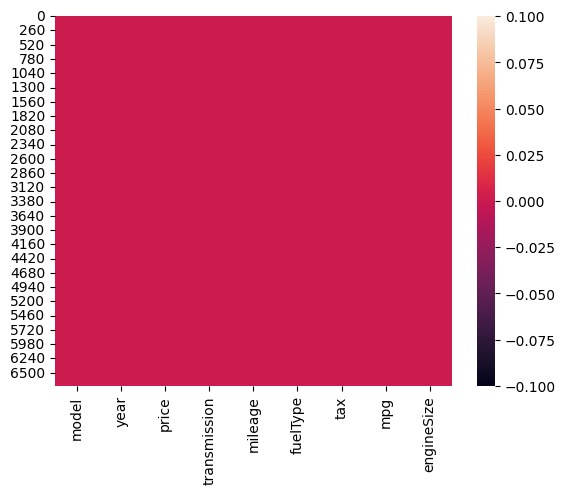

In [ ]:
sns.heatmap(data.isnull())

In [ ]:
data.describe()

,year,price,mileage,tax,mpg,engineSize
count,6738.000000,6738.000000,6738.000000,6738.000000,6738.000000,6738.000000
mean,2016.748145,12522.391066,22857.413921,94.697240,63.042223,1.471297
std,2.204062,6345.017587,19125.464147,73.880776,15.836710,0.436159
min,1998.000000,850.000000,2.000000,0.000000,2.800000,0.000000
25%,2016.000000,8290.000000,9446.000000,0.000000,55.400000,1.000000
50%,2017.000000,10795.000000,18513.000000,135.000000,62.800000,1.500000
75%,2018.000000,14995.000000,31063.750000,145.000000,69.000000,1.800000
max,2020.000000,59995.000000,174419.000000,565.000000,235.000000,4.500000


Visualisasi Data

<ipython-input-32-c59d314e94cb>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(),annot=True)


<Axes: >

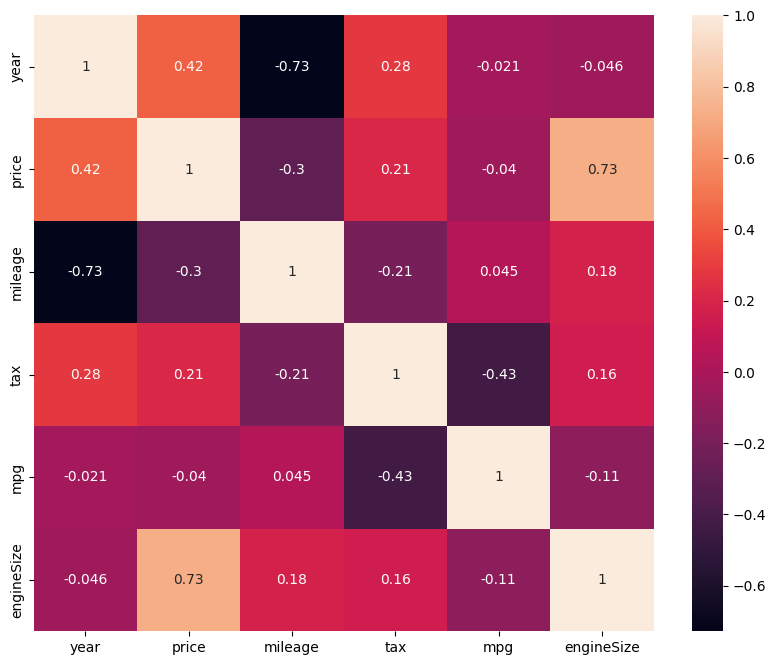

In [ ]:
plt.figure (figsize=(10,8))
sns.heatmap(data.corr(),annot=True)

menghitung jumah data

In [ ]:
models = data.groupby('model').count()[['tax']].sort_values(by='tax',ascending=True).reset_index()
models = models.rename(columns={'tax':'nomberofCars'})

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17]),
 [Text(0, 0, ' Verso-S'),
  Text(1, 0, ' Urban Cruiser'),
  Text(2, 0, ' IQ'),
  Text(3, 0, ' Camry'),
  Text(4, 0, ' Supra'),
  Text(5, 0, ' PROACE VERSO'),
  Text(6, 0, ' Land Cruiser'),
  Text(7, 0, ' GT86'),
  Text(8, 0, ' Hilux'),
  Text(9, 0, ' Verso'),
  Text(10, 0, ' Avensis'),
  Text(11, 0, ' Prius'),
  Text(12, 0, ' Corolla'),
  Text(13, 0, ' RAV4'),
  Text(14, 0, ' C-HR'),
  Text(15, 0, ' Auris'),
  Text(16, 0, ' Aygo'),
  Text(17, 0, ' Yaris')])

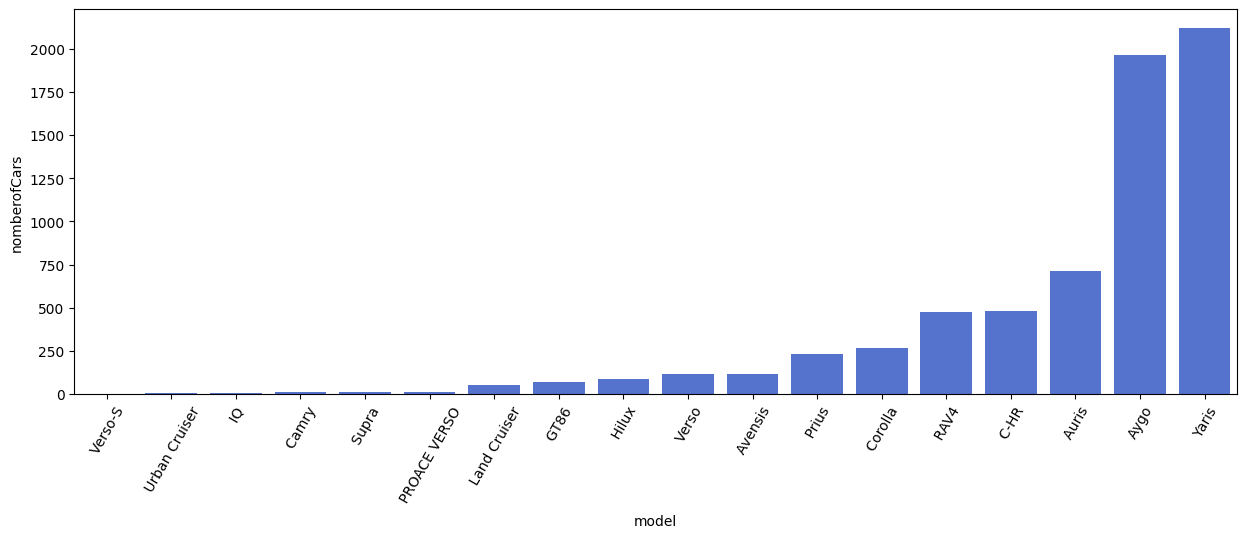

In [ ]:
fig = plt.figure(figsize=(15,5))
sns.barplot(x=models['model'], y=models['nomberofCars'], color='royalblue')
plt.xticks(rotation=60)

ukuran mesin

In [ ]:
engine = data.groupby('engineSize').count()[['tax']].sort_values(by='tax').reset_index()
engine = engine.rename(columns={'tax':'count'})

<Axes: xlabel='engineSize', ylabel='count'>

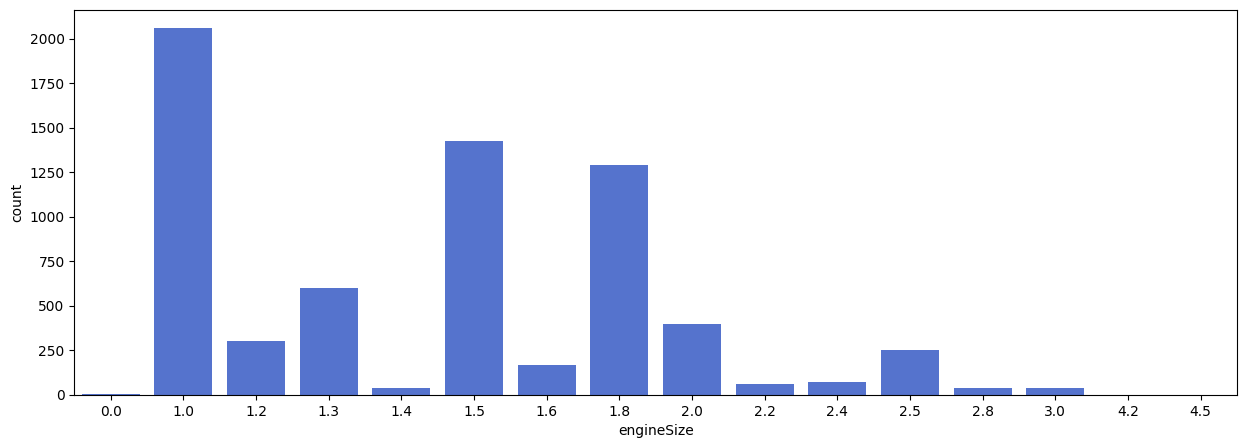

In [ ]:
plt.figure(figsize=(15,5))
sns.barplot(x=engine['engineSize'],y=engine['count'], color='royalblue')

mengolah data mile age

<Figure size 1500x500 with 0 Axes>

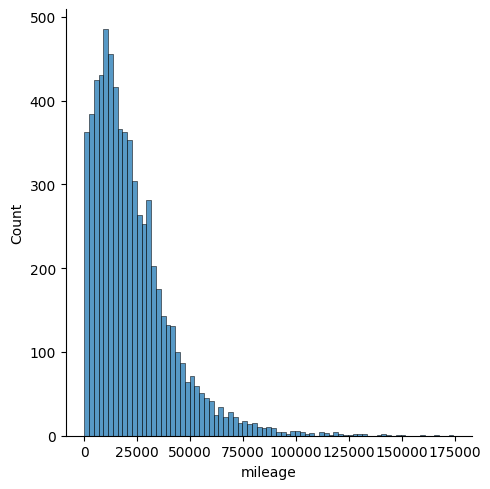

In [ ]:
plt.figure(figsize=(15,5))
sns.displot(data['mileage'])

distribusi harga mobile

<Figure size 1500x500 with 0 Axes>

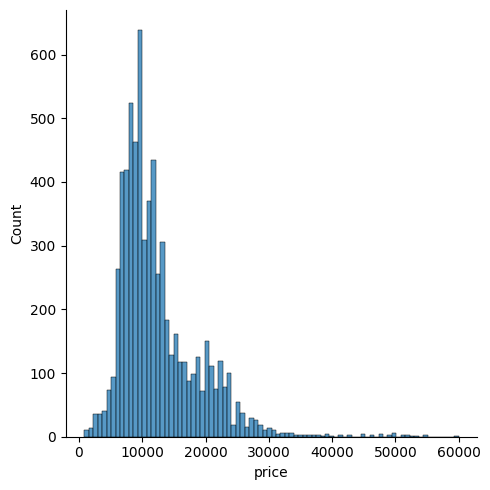

In [ ]:
plt.figure(figsize=(15,5))
sns.displot(data['price'])

memilih fitur untuk model

In [ ]:
feature = ['year','mileage','tax',"mpg", 'engineSize']
x= data[feature]
y = data ['price']
x.shape, y.shape

((6738, 5), (6738,))

membuat data buat train dan data test

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,random_state=70)
y.shape

(6738,)

buat model dengan linenar regresi

In [ ]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_train,y_train)
pre = lr.predict(x_test)

In [ ]:
score = lr.score(x_test, y_test)
print ('akurasi model regresi linear = ', score)

akurasi model regresi linear =  0.7678983314475207


membuat untuk input regresinya

In [ ]:
#untuk menentukan sesuai dengan tahun
#year=2019, mileage=5000, tax=145, mpg=30.2, enginesize-2
input_data = np.array([[2019,5000,145,30.2,2]])
prediction = lr.predict(input_data)
print('estimasi harga mobil dalam EUR : ', prediction)

estimasi harga mobil dalam EUR :  [21208.50538579]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


buat save file modelnya

In [ ]:
import pickle

filename = 'kisaran_harga_mobil.sav'
pickle.dump(lr,open(filename, 'wb'))